In [5]:
import requests
from bs4 import BeautifulSoup
import re
import base64
from typing import List, Dict, Tuple
from lxml import html
from captcha_solver.challenges.text_challenge import TextChallenge
from captcha_solver.solvers import CaptchaSolverBase
from registry import Registry
from captcha_solver.solvers.model_apis.TrOCR_api import TrOCR_API
from login_handler import LoginHandler
import time 
import random
import numpy as np
from tbselenium.tbdriver import TorBrowserDriver
from selenium.common.exceptions import TimeoutException
import os
import shutil
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC


In [18]:
GECKO_DRIVER_EXE_PATH = shutil.which("geckodriver")
driver = TorBrowserDriver(os.getenv("TBB_PATH","/opt/tor-browser/"), 
                        tbb_logfile_path=os.getenv("TBB_LOG_PATH","/opt/tor-browser/logs/tbselenium.log"),
                        executable_path=GECKO_DRIVER_EXE_PATH)

CAPTCHA_IMAGE_DIR = "temp_captcha"
CAPTCHA_IMAGE_PATH = f"{CAPTCHA_IMAGE_DIR}/text_captcha.png"
DEFAULT_COLOUR = 'FF0000'
def download_captcha_image(captcha_base64):
    if not os.path.isdir(CAPTCHA_IMAGE_DIR):
        os.mkdir(CAPTCHA_IMAGE_DIR)
    
    with open(CAPTCHA_IMAGE_PATH, 'wb') as f:
        f.write(base64.b64decode(captcha_base64))
        
def _input_text(driver, field_name, text):
    field = driver.find_element(By.NAME, field_name)
    field.clear()
    for key in text:
        field.send_keys(key)
        time.sleep(random.uniform(0.1, 0.3))
        
username = "massive_disappointment"
password = "massive_disappointment"

#login_handler = LoginHandler(driver, username, password, logger, darkweb=darkweb, custom_prompt=custom_prompt)
url = "http://wg7ljicnzfrh7dhssrsqgiqhqe7vgzc2ovyit2zz5bgiolztieljmjyd.onion/chat.php"
driver.get(url)

# Extract captcha image and challenge value
captcha_image_element = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CSS_SELECTOR, 'img')))
captcha_base64 = captcha_image_element.get_attribute('src').split(',')[1]
print(captcha_base64)
download_captcha_image(captcha_base64)
# send username and password and captcha
captcha_soln = "y,^!6"
input_username = _input_text(driver, "nick", username)
input_password = _input_text(driver, "pass", password)
input_captcha = _input_text(driver, "captcha", captcha_soln)

## submit form
driver.find_element(By.CSS_SELECTOR, "input[type='submit']").click()

# check if there is a button with value "Back to the login page", then click it
def check_successful_login(driver):
    try:
        backbutton = driver.find_element(By.XPATH, "//input[@value='Back to the login page.'] | //class[@value='backbutton']")
        if backbutton:
            backbutton.click()
            return False
        else:
            return True
    except:
        return True
    
if check_successful_login(driver):
    print("Login successful")
else:
    print("Login failed")




In [24]:
# get current html of page
html = driver.page_source
# parse html
soup = BeautifulSoup(html, 'html.parser')

In [25]:
html

'<html lang="en"><head><meta http-equiv="Content-Type" content="text/html; charset=UTF-8"><meta name="referrer" content="no-referrer"><meta name="viewport" content="width=device-width, initial-scale=1, user-scalable=yes"><meta name="theme-color" content="#000000"><meta name="msapplication-TileColor" content="#000000"><meta name="description" content=""><link rel="icon" href="icons/sus.ico" sizes="32x32"><title>💖🍒HeBe + TeeN ChaT 🍒💖</title><style type="text/css">body,iframe{background-color:#000000;color:#FFFFFF;font-size:14px;text-align:center}a:visited{color:#B33CB4} a:link{color:#00A2D4} a:active{color:#55A2D4} #messages{word-wrap:break-word}input,select,textarea{color:#FFFFFF;background-color:#000000} .messages a img{width:15%} .messages a:hover img{width:35%} .error{color:#FF0033;text-align:left} .delbutton{background-color:#660000} .backbutton{background-color:#004400} #exitbutton{background-color:#AA0000} .setup table table,.admin table table,.profile table table{width:100%;text-

In [4]:
# Function to manually solve the captcha (or integrate with a captcha solving service)
def solve_captcha(captcha_image: str) -> str:
    
    challenge = TextChallenge.from_selenium_element(None, captcha_image, None, None)

    output = login_handler._handle_captcha_challenge(challenge, return_only=True)
    
    return output

# Define the Tor proxy
proxies = {
    'http': 'socks5h://localhost:9050',
    'https': 'socks5h://localhost:9050'
}


# Create a session object with Tor proxies
with requests.Session() as session:
    session.proxies.update(proxies)

    # Define the URL of the initial pagehttp://jwzzevnbrletxx7e4nqmfv73mre7rjik6nktidduppjcei6xr75aybyd.onion/
    initial_page_url = 'http://wg7ljicnzfrh7dhssrsqgiqhqe7vgzc2ovyit2zz5bgiolztieljmjyd.onion/chat.php'

    # GET request to the initial page
    initial_response = session.get(initial_page_url)
    login_soup = BeautifulSoup(initial_response.text, 'html.parser')


# grab captcha image data from the page
captcha_img_data = login_soup.find('img')['src']
# the captcha image data is a base64 encoded string
# extract the base64 encoded string
captcha_base64_encoded = captcha_img_data.split(',')[1]
# decode the base64 encoded string
captcha_bytes = base64.b64decode(captcha_base64_encoded)

captcha_img_path = 'captcha.jpg'
# save the decoded image to a file
with open(captcha_img_path, 'wb') as f:
    f.write(captcha_bytes)

challenge_value = login_soup.select_one('input[name="challenge"]')['value']
captcha_value = solve_captcha(captcha_img_path)


Stage 1
Stage II
==================captcha==================
S\NUN


/home/azureuser/.local/lib/python3.10/site-packages/transformers/generation/utils.py:1346: UserWarning: Using `max_length`'s default (20) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


In [22]:
request = session.get(initial_page_url, proxies=proxies)

In [23]:
request.url

'http://wg7ljicnzfrh7dhssrsqgiqhqe7vgzc2ovyit2zz5bgiolztieljmjyd.onion/chat.php'

In [12]:
# Define the payload for POST request to login
payload = {
    'nick': username,
    'pass': password,
    'captcha': None,
    'challenge': challenge_value,
    'colour': 'FF0000'  # Example color value
}

# Send POST request to login
login_response = session.post(initial_page_url, data=payload)

# Check if login was successful
if login_response.ok:
    print("Login successful!")
    # You can now navigate or scrape other pages using the session
else:
    print("Login failed!")

Login successful!


In [17]:
login_response.url

'http://wg7ljicnzfrh7dhssrsqgiqhqe7vgzc2ovyit2zz5bgiolztieljmjyd.onion/chat.php'

In [11]:
page_html.text

In [ ]:
html_content = login_response.text
iframe = html.fromstring(html_content)

In [ ]:
# find the word "massivedisappointment" in the iframe
# this is the iframe that contains the chat
iframe_src = iframe.xpath('//iframe[contains(text(), "massivedisappointment")]/@src')

In [4]:
import requests
from bs4 import BeautifulSoup
import base64
import os

def download_captcha_images(url, n, save_dir="captchas"):
    """
    Downloads captcha images from a login page.

    Args:
        url (str): The URL of the login page.
        n (int): Number of captcha images to download.
        save_dir (str): Directory to save the captcha images.
    """
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    proxies = {
            'http': 'socks5h://localhost:9050',
            'https': 'socks5h://localhost:9050'
            }
        
    # check if save_dir exists
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    # check how many captcha images already exist in save_dir
    existing_files = os.listdir(save_dir)
    n_existing = len(existing_files)
    
    for i in range(n):
        response = session.get(url, proxies=proxies)
        if response.ok:
            soup = BeautifulSoup(response.content, 'html.parser')
            captcha_img_tag = soup.find('img')
            if captcha_img_tag:
                captcha_data = captcha_img_tag['src'].split(',')[1]
                captcha_bytes = base64.b64decode(captcha_data)
                captcha_path = os.path.join(save_dir, f'captcha_{i+n_existing}.jpg')
                
                with open(captcha_path, 'wb') as f:
                    f.write(captcha_bytes)
                print(f"Captcha {i+1} downloaded.")
            else:
                print(f"No captcha found on attempt {i+1}.")
        else:
            print(f"Failed to access the login page on attempt {i+1}.")
        time.sleep(np.random.randint(5, 10))

In [36]:
page_url = 'http://wg7ljicnzfrh7dhssrsqgiqhqe7vgzc2ovyit2zz5bgiolztieljmjyd.onion/chat.php'
save_dir = 'temp/captchas' 
n_captchas = 50

download_captcha_images(page_url, n_captchas, save_dir=save_dir)

Captcha 1 downloaded.
Captcha 2 downloaded.
Captcha 3 downloaded.
Captcha 4 downloaded.
Captcha 5 downloaded.
Captcha 6 downloaded.
Captcha 7 downloaded.
Captcha 8 downloaded.
Captcha 9 downloaded.
Captcha 10 downloaded.
Captcha 11 downloaded.
Captcha 12 downloaded.
Captcha 13 downloaded.
Captcha 14 downloaded.
Captcha 15 downloaded.
Captcha 16 downloaded.
Captcha 17 downloaded.
Captcha 18 downloaded.
Captcha 19 downloaded.
Captcha 20 downloaded.
Captcha 21 downloaded.
Captcha 22 downloaded.
Captcha 23 downloaded.
Captcha 24 downloaded.
Captcha 25 downloaded.
Captcha 26 downloaded.
Captcha 27 downloaded.
Captcha 28 downloaded.
Captcha 29 downloaded.
Captcha 30 downloaded.
Captcha 31 downloaded.
Captcha 32 downloaded.
Captcha 33 downloaded.
Captcha 34 downloaded.
Captcha 35 downloaded.
Captcha 36 downloaded.
Captcha 37 downloaded.
Captcha 38 downloaded.
Captcha 39 downloaded.
Captcha 40 downloaded.
Captcha 41 downloaded.
Captcha 42 downloaded.
Captcha 43 downloaded.
Captcha 44 downloade

In [5]:
from captcha_solver.solvers.model_apis.image2text import * 
import re
import matplotlib.pyplot as plt

''

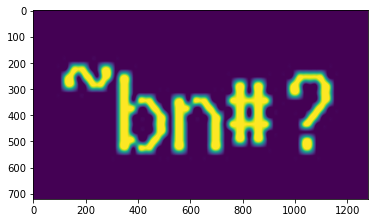

In [6]:
image_path = 'temp/captchas/captcha_35.jpg'
img = pre_process(image_path)
plt.imshow(img)
captcha_text = get_text(image_path)
print(captcha_text)
# remove new line and space characters and \x characters
captcha_text = re.sub(r'[\n\s\x0c]', '', captcha_text)
captcha_text